In [83]:
import json
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [3]:
tf.get_logger().setLevel('ERROR')

In [61]:
X = pd.read_json('X.json')
Y = pd.read_json('y.json')

In [121]:
tf.random.set_seed(0)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
X_train = X_train.values
X_val = X_val.values

In [80]:

#DNN
modelDNN = keras.Sequential([
    #1st hidden layer
    keras.layers.Dense(512, activation="relu", input_dim=X_train.shape[1], kernel_regularizer=keras.regularizers.l2(0.001)),
    # keras.layers.Dropout(0.5),
    
    #2nd hidden layer
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    # keras.layers.Dropout(0.5),
    
    #3rd hidden layer
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    # keras.layers.Dropout(0.5),
    
    #output layer
    keras.layers.Dense(2, activation="sigmoid")])

#optimizer = keras.optimizers.Adam(learning_rate=0.1)
modelDNN.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = modelDNN.fit(X_train, Y_train,
          epochs = 150,
          batch_size = 15,
          shuffle=True,
          class_weight={0: 1, 1: 1.5},
          verbose=0)

3/3 [==============================] - 0s 4ms/step - loss: 1.1078 - accuracy: 0.8171


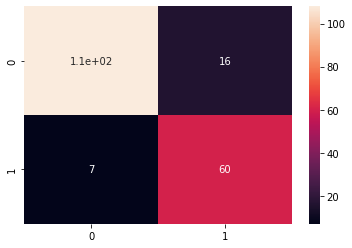

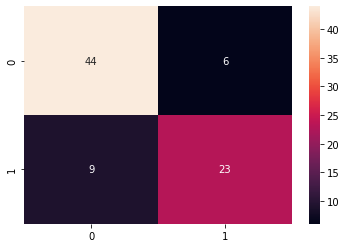

In [81]:
modelDNN.evaluate(X_train, Y_train)
modelDNN.evaluate(X_val, Y_val)

pred_train = modelDNN.predict_classes(X_train)
pred_val = modelDNN.predict_classes(X_val)

cm0 = confusion_matrix(np.argmax(Y_train, axis=1), pred_train)
fig0 = plt.figure()
sns.heatmap(cm0, annot=True)
plt.show()

cm1 = confusion_matrix(np.argmax(Y_val, axis=1), pred_val)
fig1 = plt.figure()
sns.heatmap(cm1, annot=True)
plt.show()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


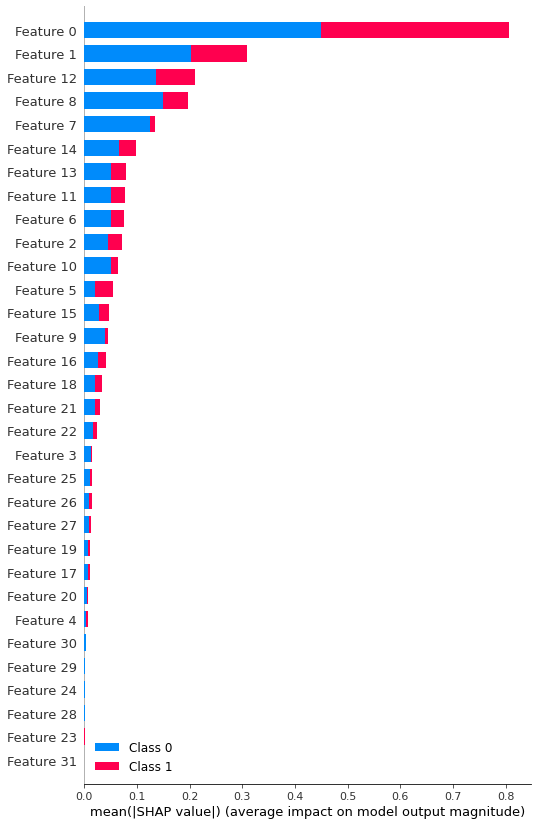

In [82]:
explainer = shap.DeepExplainer(modelDNN, X_train)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val, plot_type="bar", max_display=32)